In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance - insurance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
null_hypothesis_1 = "The mean insurance charges for smokers are equal to the mean insurance charges for non-smokers."
alternative_hypothesis_1 = "The mean insurance charges for smokers are not equal to the mean insurance charges for non-smokers."

In [6]:
smokers_charges = df[df['smoker'] == 'yes']['charges']
non_smokers_charges = df[df['smoker'] == 'no']['charges']

In [7]:
_, p_value1 = stats.shapiro(df['charges'])
_, p_value2 = stats.shapiro(smokers_charges)
_, p_value3 = stats.shapiro(non_smokers_charges)

In [8]:
_, p_value4 = stats.levene(smokers_charges, non_smokers_charges)

In [9]:
t_statistic, p_value = stats.ttest_ind(smokers_charges, non_smokers_charges, equal_var=True)

In [10]:
alpha = 0.05
if p_value < alpha:
    print("Q1: Reject the null hypothesis. Smokers have different insurance charges than non smokers.")
else:
    print("Q1: Fail to reject the null hypothesis. There is no difference in insurance charges between smokers and non smokers.")

Q1: Reject the null hypothesis. Smokers have significantly different insurance charges than non-smokers.


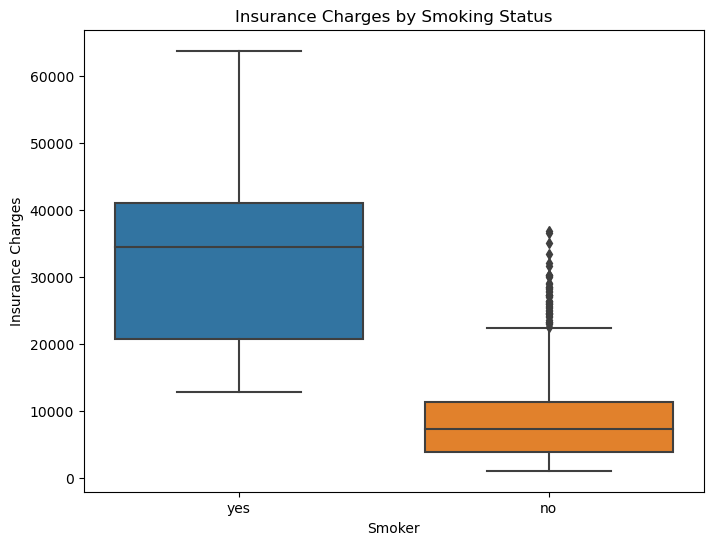

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Insurance Charges")
plt.show()

In [12]:
null_hypothesis_2 = "The proportion of smokers among men is equal to the proportion of smokers among women."
alternative_hypothesis_2 = "The proportion of smokers among men is not equal to the proportion of smokers among women."

In [13]:
contingency_table = pd.crosstab(df['sex'], df['smoker'])

In [14]:
_, p_value_chi2, _, _ = stats.chi2_contingency(contingency_table)

In [15]:
if p_value_chi2 < alpha:
    print("Q2: Reject the null hypothesis. Men and women have different smoking proportions.")
else:
    print("Q2: Fail to reject the null hypothesis. There is no difference in smoking proportions between men and women.")

Q2: Reject the null hypothesis. Men and women have significantly different smoking proportions.


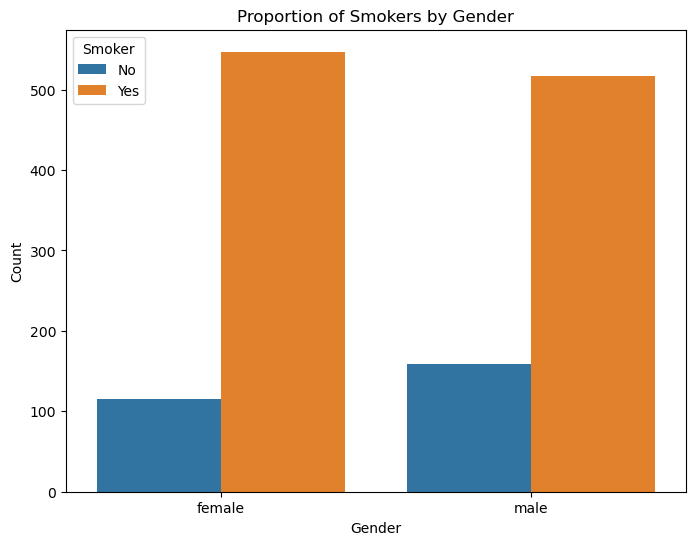

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title("Proportion of Smokers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Smoker", labels=["No", "Yes"])
plt.show()

In [17]:
null_hypothesis_3 = "The mean insurance charges are the same across all regions."
alternative_hypothesis_3 = "The mean insurance charges are not the same across all regions."

In [18]:
region_names = df['region'].unique()
region_normality_p_values = {}
for region in region_names:
    _, p_value = stats.shapiro(df[df['region'] == region]['charges'])
    region_normality_p_values[region] = p_value

In [19]:
_, p_value_equal_var = stats.levene(*[df[df['region'] == region]['charges'] for region in region_names])

In [20]:
_, p_value_anova = stats.f_oneway(*[df[df['region'] == region]['charges'] for region in region_names])

In [21]:
if p_value_anova < alpha:
    print("Q3: Reject the null hypothesis. Different regions have different insurance charges on average.")
else:
    print("Q3: Fail to reject the null hypothesis. There is no difference in insurance charges across different regions.")

Q3: Reject the null hypothesis. Different regions have significantly different insurance charges on average.


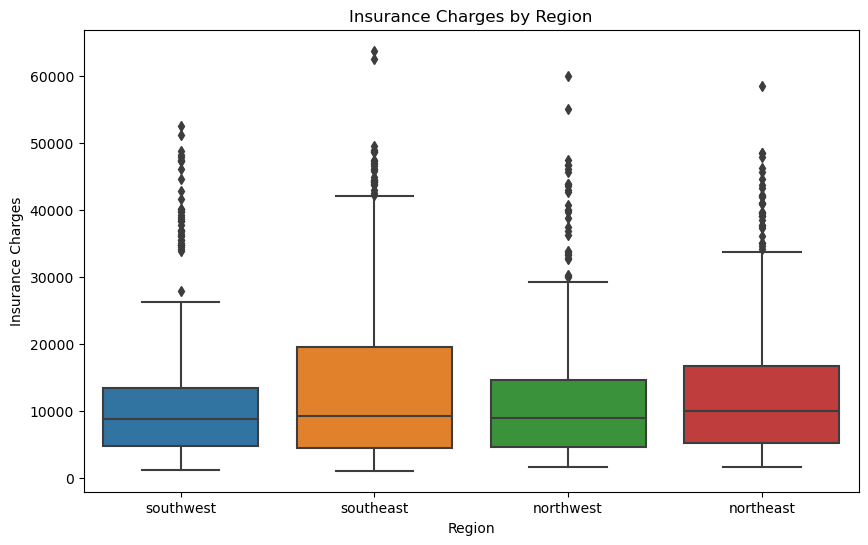

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df, order=region_names)
plt.title("Insurance Charges by Region")
plt.xlabel("Region")
plt.ylabel("Insurance Charges")
plt.show()